In [1]:
import galsim
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Uniform, Beta

### Simulating galaxies with shear

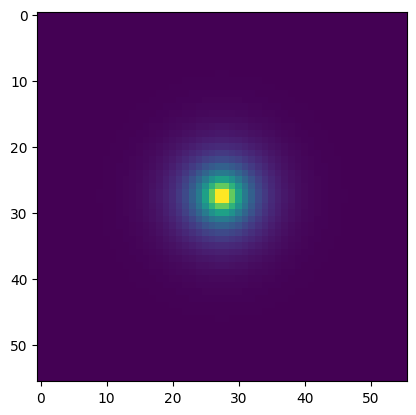

In [2]:
# No shear or convergence
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
_ = plt.imshow(gal.drawImage().array)

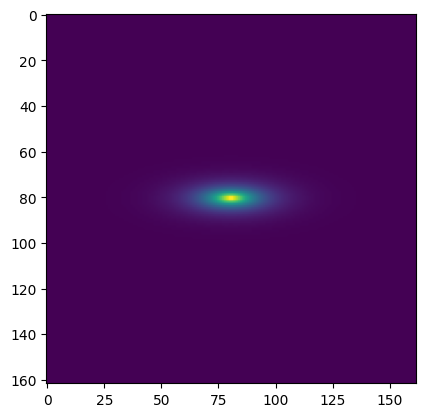

In [3]:
# Shear in direction 1
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0.5, g2=0)
_ = plt.imshow(gal.drawImage().array)

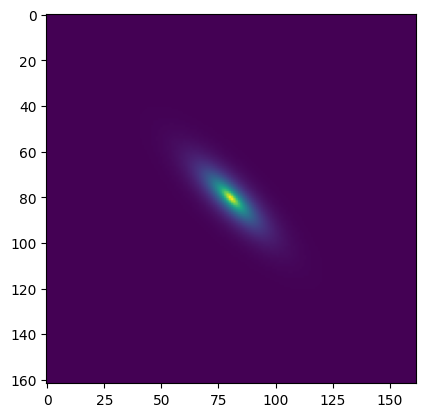

In [4]:
# Shear in direction 2
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0, g2=0.5)
_ = plt.imshow(gal.drawImage().array)

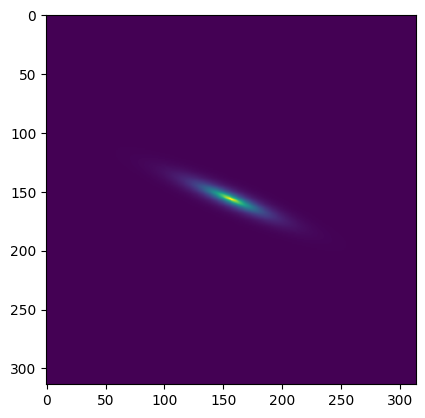

In [5]:
# Shear in directions 1 and 2
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0.5, g2=0.5)
_ = plt.imshow(gal.drawImage().array)

gamma1 = 0.27656418085098267
gamma2 = -0.3329014778137207
kappa = 0.04033169150352478 

g1 = 0.28818726539611816
g2 = -0.34689223766326904
mu = 1.3630439043045044


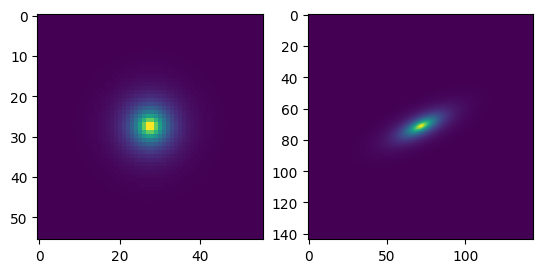

In [6]:
# Lensing
gamma1 = Uniform(-0.5, 0.5).sample()
gamma2 = Uniform(-0.5, 0.5).sample()
kappa = Uniform(0, 0.25).sample()
print('gamma1 =', gamma1.item())
print('gamma2 =', gamma2.item())
print('kappa =', kappa.item(), '\n')

g1 = gamma1/(1-kappa)
g2 = gamma2/(1-kappa)
mu = 1/((1-kappa)**2 - gamma1**2 - gamma2**2)
print('g1 =', g1.item())
print('g2 =', g2.item())
print('mu =', mu.item())

fig, (unlensed, lensed) = plt.subplots(nrows=1, ncols=2)

gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
_ = unlensed.imshow(gal.drawImage().array)
gal_lensed = gal.lens(g1=g1, g2=g2, mu=mu)
_ = lensed.imshow(gal_lensed.drawImage().array)